In [1]:
import os
# List files in the dataset directory
input_path = '/kaggle/input'
all_files = []

for dirname, _, filenames in os.walk(input_path):
    all_files.extend([os.path.join(dirname, filename) for filename in filenames])

# Print the total number of files
print(f"Total files found: {len(all_files)}")


Total files found: 24335


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size = (150, 150) 
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  
    validation_split=0.2 
)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/intel-image-classification/seg_train/seg_train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/kaggle/input/intel-image-classification/seg_train/seg_train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/intel-image-classification/seg_test/seg_test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1731950146.100189     115 service.cc:145] XLA service 0x790f040028e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731950146.100244     115 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731950146.100250     115 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/350 ━━━━━━━━━━━━━━━━━━━━ 1:19:29 14s/step - accuracy: 0.0938 - auc: 0.4947 - loss: 1.9729 - precision: 0.0000e+00 - recall: 0.0000e+00

I0000 00:00:1731950151.666006     115 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


350/350 ━━━━━━━━━━━━━━━━━━━━ 92s 226ms/step - accuracy: 0.3166 - auc: 0.6960 - loss: 1.6241 - precision: 0.5406 - recall: 0.0115 - val_accuracy: 0.4379 - val_auc: 0.8166 - val_loss: 1.3297 - val_precision: 0.6704 - val_recall: 0.1491
Epoch 2/10
  1/350 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.4688 - auc: 0.8548 - loss: 1.2340 - precision: 0.6667 - recall: 0.1875

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4688 - auc: 0.8548 - loss: 1.2340 - precision: 0.6667 - recall: 0.1875 - val_accuracy: 0.3000 - val_auc: 0.7460 - val_loss: 1.5213 - val_precision: 0.4286 - val_recall: 0.1500
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.5069 - auc: 0.8535 - loss: 1.2291 - precision: 0.7344 - recall: 0.1664 - val_accuracy: 0.5704 - val_auc: 0.8788 - val_loss: 1.1145 - val_precision: 0.7600 - val_recall: 0.2514
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step - accuracy: 0.5000 - auc: 0.8651 - loss: 1.2386 - precision: 0.8462 - recall: 0.3438 - val_accuracy: 0.6500 - val_auc: 0.9142 - val_loss: 0.9800 - val_precision: 0.8000 - val_recall: 0.4000
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.5840 - auc: 0.8874 - loss: 1.0780 - precision: 0.7575 - recall: 0.3069 - val_accuracy: 0.6218 - val_auc: 0.9003 - val_loss: 1.0223 - val_precision: 0.7731 - val_recall: 0.3452
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━

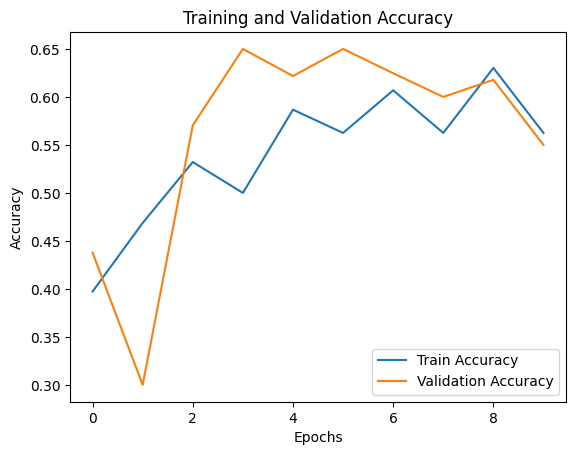

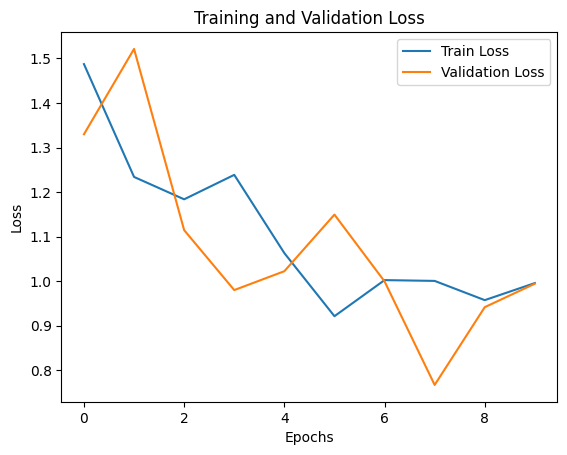

In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, AUC
import matplotlib.pyplot as plt

# Load the pretrained ResNet50 model without the top layer
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

# Add custom layers for our specific classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduces feature dimensions to a single vector
x = Dense(128, activation='relu')(x)  # Fully connected layer with 128 neurons
output = Dense(train_generator.num_classes, activation='softmax')(x)  # Output layer with softmax for multi-class classification

# Combine the base model and custom layers
model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers to retain pretrained weights
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy', Precision(), Recall(), AUC()])

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model on the validation set
val_loss, val_accuracy, val_precision, val_recall, val_auc = model.evaluate(validation_generator)

# Compute F1-score
f1_score = 2 * (val_precision * val_recall) / (val_precision + val_recall + 1e-7)

# Print evaluation metrics
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Validation AUC: {val_auc:.4f}")
print(f"Validation F1-Score: {f1_score:.4f}")

# Save the trained model
model.save('resnet50_custom_model.h5')
print("Model saved successfully.")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1731950947.050585     115 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_31', 20 bytes spill stores, 20 bytes spill loads



350/350 ━━━━━━━━━━━━━━━━━━━━ 170s 325ms/step - accuracy: 0.6748 - auc_1: 0.9015 - loss: 1.5639 - precision_1: 0.7513 - recall_1: 0.6099 - val_accuracy: 0.1642 - val_auc_1: 0.5269 - val_loss: 2.6180 - val_precision_1: 0.3952 - val_recall_1: 0.0176
Epoch 2/10
  1/350 ━━━━━━━━━━━━━━━━━━━━ 1:12 207ms/step - accuracy: 0.8438 - auc_1: 0.9868 - loss: 0.9993 - precision_1: 0.8966 - recall_1: 0.8125

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8438 - auc_1: 0.9868 - loss: 0.9993 - precision_1: 0.8966 - recall_1: 0.8125 - val_accuracy: 0.0500 - val_auc_1: 0.3967 - val_loss: 2.8714 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 87s 243ms/step - accuracy: 0.8937 - auc_1: 0.9882 - loss: 0.9241 - precision_1: 0.9055 - recall_1: 0.8762 - val_accuracy: 0.7234 - val_auc_1: 0.9456 - val_loss: 1.3634 - val_precision_1: 0.7674 - val_recall_1: 0.6825
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step - accuracy: 1.0000 - auc_1: 1.0000 - loss: 0.6767 - precision_1: 1.0000 - recall_1: 1.0000 - val_accuracy: 0.7500 - val_auc_1: 0.9487 - val_loss: 1.3141 - val_precision_1: 0.7500 - val_recall_1: 0.6000
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 88s 247ms/step - accuracy: 0.9045 - auc_1: 0.9902 - loss: 0.8703 - precision_1: 0.9167 - recall_1: 0.8933 - val_accuracy: 0.8973 - val_auc_1: 0.9877 - val_loss: 0.8836 - val_precision_1: 0.9061 - 

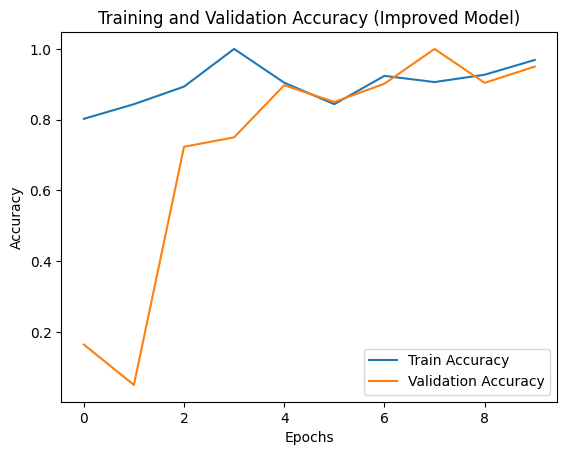

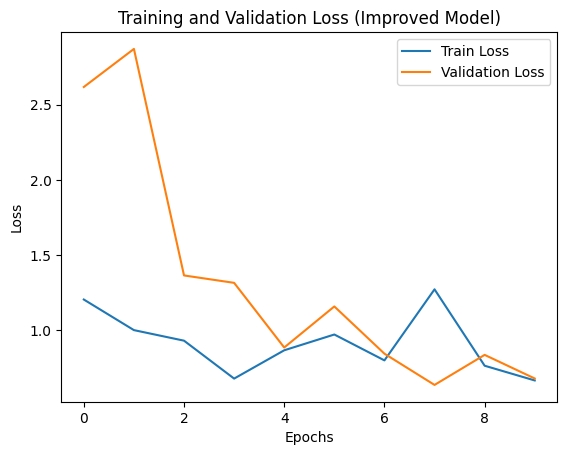

In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Paths to data directories
data_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
test_dir = '/kaggle/input/intel-image-classification/seg_test/seg_test'

# Image size and batch size
img_size = (150, 150)
batch_size = 32

# Data augmentation for training
augmented_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    rotation_range=15,  # Random rotation
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1,  # Random vertical shift
    shear_range=0.1,  # Shear transformations
    zoom_range=0.1,  # Zoom transformations
    horizontal_flip=True,  # Horizontal flip
    fill_mode='nearest',  # Fill gaps with nearest pixel values
    validation_split=0.2  # Split 20% of data for validation
)

# Training data generator
train_augmented_generator = augmented_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use training subset (80%)
)

# Validation data generator
val_generator = augmented_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use validation subset (20%)
)

# Test data generator (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle to ensure consistent results
)

# Load the pretrained ResNet50 model without the top layer
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

# Add custom layers for the improved model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling to reduce feature dimensions
x = BatchNormalization()(x)  # Normalize features for better training stability
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)  # Fully connected layer with regularization
x = Dropout(0.3)(x)  # Dropout to prevent overfitting
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)  # Additional dense layer with regularization
x = Dropout(0.3)(x)  # Dropout
output = Dense(train_augmented_generator.num_classes, activation='softmax')(x)  # Final classification layer

# Define the model
improved_model = Model(inputs=base_model.input, outputs=output)

# Compile the model with additional metrics
improved_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall(), AUC()]
)

# Train the model
history_improved = improved_model.fit(
    train_augmented_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=train_augmented_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall, test_auc = improved_model.evaluate(test_generator)

# Calculate F1-score
f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall + 1e-7)

# Print test metrics
print(f"Improved Model Test Accuracy: {test_accuracy:.4f}")
print(f"Improved Model Test Precision: {test_precision:.4f}")
print(f"Improved Model Test Recall: {test_recall:.4f}")
print(f"Improved Model Test AUC: {test_auc:.4f}")
print(f"Improved Model Test F1-Score: {f1_score:.4f}")

# Save the model
improved_model.save('improved_model.h5')
print("Improved model saved successfully.")

# Plot training and validation accuracy
plt.plot(history_improved.history['accuracy'], label='Train Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Improved Model)')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_improved.history['loss'], label='Train Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Improved Model)')
plt.legend()
plt.show()


Comparison of Models:
Accuracy: Base Model = 0.6327, Improved Model = 0.9130
Precision: Base Model = 0.7558, Improved Model = 0.9177
Recall: Base Model = 0.4447, Improved Model = 0.9070
AUC: Base Model = 0.9129, Improved Model = 0.9892
F1-Score: Base Model = 0.5599, Improved Model = 0.9123


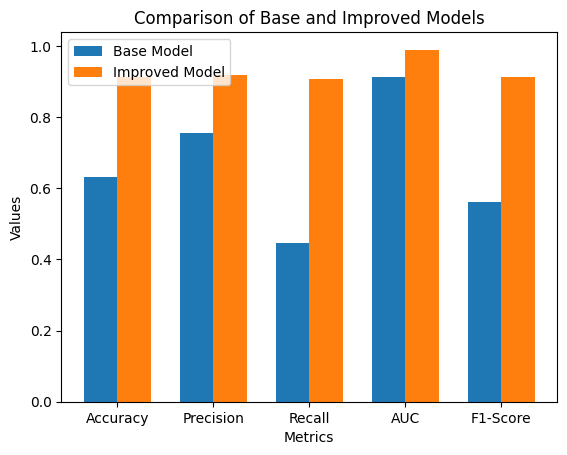

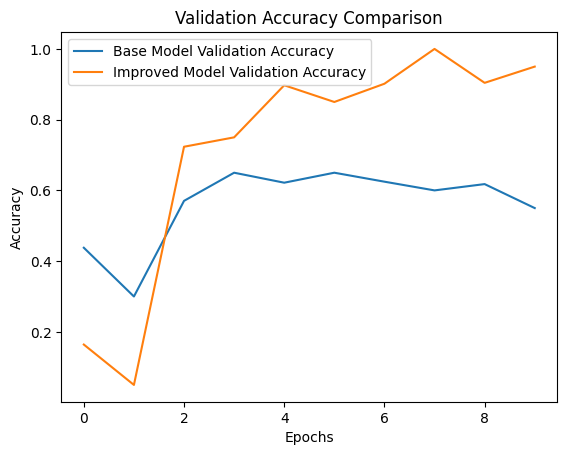

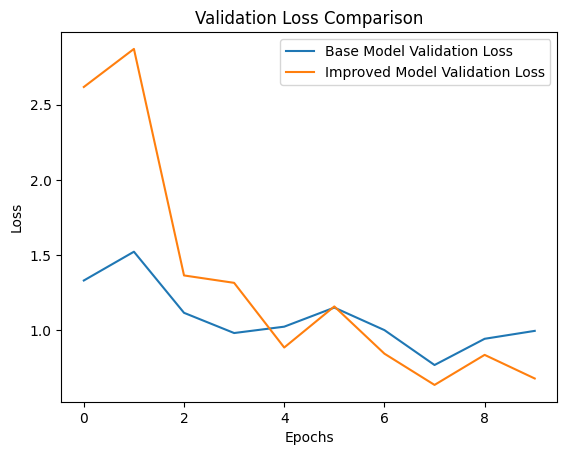

In [7]:
import matplotlib.pyplot as plt

# Base model metrics
base_model_metrics = {
    "Accuracy": val_accuracy,  # From base model evaluation
    "Precision": val_precision,
    "Recall": val_recall,
    "AUC": val_auc,
    "F1-Score": 2 * (val_precision * val_recall) / (val_precision + val_recall + 1e-7)
}

# Improved model metrics
improved_model_metrics = {
    "Accuracy": test_accuracy,  # From improved model evaluation
    "Precision": test_precision,
    "Recall": test_recall,
    "AUC": test_auc,
    "F1-Score": f1_score
}

# Print comparison of metrics
print("Comparison of Models:")
for metric in base_model_metrics.keys():
    print(f"{metric}: Base Model = {base_model_metrics[metric]:.4f}, Improved Model = {improved_model_metrics[metric]:.4f}")

# Visualization: Bar Chart of Metrics
labels = list(base_model_metrics.keys())
base_values = list(base_model_metrics.values())
improved_values = list(improved_model_metrics.values())

x = range(len(labels))
width = 0.35  # Width of the bars

plt.bar(x, base_values, width=width, label='Base Model', align='center')
plt.bar([p + width for p in x], improved_values, width=width, label='Improved Model', align='center')

# Adding labels, title, and legend
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Comparison of Base and Improved Models")
plt.xticks([p + width / 2 for p in x], labels)
plt.legend()
plt.show()

# Plot training vs validation accuracy for both models
plt.plot(history.history['val_accuracy'], label='Base Model Validation Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Improved Model Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.show()

# Plot training vs validation loss for both models
plt.plot(history.history['val_loss'], label='Base Model Validation Loss')
plt.plot(history_improved.history['val_loss'], label='Improved Model Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


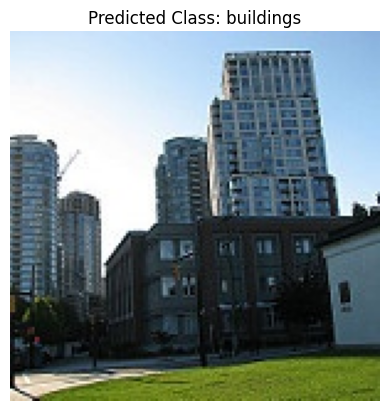

In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
import random

model_path = 'improved_model.h5'
improved_model = load_model(model_path)

folder_path = '/kaggle/input/intel-image-classification/seg_test/seg_test/buildings'
img_size = (150, 150)

random_file = random.choice(os.listdir(folder_path))
img_path = os.path.join(folder_path, random_file)

img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

predictions = improved_model.predict(img_array)
predicted_class = np.argmax(predictions)

class_indices = {
    'buildings': 0,
    'forest': 1,
    'glacier': 2,
    'mountain': 3,
    'sea': 4,
    'street': 5
}
classes = {v: k for k, v in class_indices.items()}
predicted_label = classes[predicted_class]

plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f"Predicted Class: {predicted_label}")
plt.show()
